# **Sentiment Analysis and Big Data: Understanding Sentiment at Scale - A Sentiment Analysis Tutorial of Spotify Song Lyrics Using RoBERTa and DistilRoBERTa**

**Student:** Rafain Emőke, Data Science

## **Why This Topic is Relevant**

**1. Big Data Characteristics**

* Volume: Millions of Spotify songs provide a large-scale text dataset for analysis.
* Variety: Lyrics span diverse languages, themes, and genres.
* Velocity: New songs are constantly uploaded, showcasing real-time data generation.

**2. Role of Large Language Models (LLMs)**

* What are LLMs? RoBERTa and DistilRoBERTa are transformer-based models optimized for text analysis.
* Trained on Big Data:
RoBERTa: Trained on 160GB of text (BookCorpus, Wikipedia, etc.).
Parameters: RoBERTa-base (125M), RoBERTa-large (355M).
* Why Relevant? LLMs process vast amounts of text (like lyrics) to extract nuanced sentiment insights.

**3. Sentiment Analysis as Big Data Analytics**

* Unstructured to Structured: Sentiment analysis turns lyrics into actionable insights.
* Scalability: Models like RoBERTa analyze millions of lines efficiently.
* Example: Detect emotional trends (e.g., joy, sadness) across genres or time periods.

**4. Real-World Relevance**

* Industry Impact: Platforms like Spotify rely on big data for recommendations and content analysis.
* Insights: Sentiment trends reveal listener preferences and cultural themes.
* Example: Pop lyrics tend to be upbeat, while rap often explores personal struggles.

**5. Practical and Scalable Technology**

* Tools: Combines NLP, LLMs, and big data technologies (cloud computing, distributed systems).
* Scalability: Efficiently processes large datasets to derive meaningful insights.

**Key Takeaway**

This topic is relevant because it applies big data tools (LLMs) to analyze a large-scale, real-world dataset (Spotify lyrics), providing insights that are scalable and industry-relevant.

##**Overview of Sentiment Analysis**

**Sentiment Analysis:**
Sentiment Analysis is a technique used in Natural Language Processing (NLP) to determine the emotional tone or opinion expressed in a piece of text.

**Use-cases of Sentiment Analysis:**

* **Customer Feedback and Reviews**:
   - Analyzing customer reviews to measure overall satisfaction and identify areas for improvement.
* **Brand Monitoring**:
   - Keeping track of brand reputation by analyzing mentions and discussions on social media and news articles.
* **Financial Market Analysis**:
   - Analyzing news articles and social media posts to predict stock market trends and investor sentiment.

##**Comparing RoBERTa and DistilRoBERTa on Spotify Song Lyrics**

For this research presentation I will be comparing RoBERTa and DistilRoBERTa - popular pretrained and easy-to-apply sentiment analysis models - to analyze the sentiment of 100 Spotify songs.

**Strategy:**
* Preprocess data
* Use RoBERTa to analyze the sentiment of the songs
* Use DistilRoBERTa to analyze the sentiment of the songs
* Compare results
* Show Use-cases

**Dataset:**
The dataset I used for comparing different Sentiment Analysis approaches can be found on Kaggle using the following link: https://www.kaggle.com/datasets/imuhammad/audio-features-and-lyrics-of-spotify-songs
* This dataset has approximately 18.000 records. After cleaning the dataset I took a random sample of 100 songs in order to minimize the runtime of the models.
* I decided to use song lyrics instead of natural language text to see how these models would perform on slightly different data; songs are different as they contain metaphors, repetitions etc.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
sns.set_style("dark")
sns.set_palette("Paired")

In [ ]:
sns.color_palette()

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [ ]:
palette = sns.color_palette()

In [ ]:
songs = pd.read_csv('sample_songs_100.csv')

In [ ]:
songs.shape

(100, 4)

In [ ]:
songs.head()

,lyrics,playlist_genre,playlist_subgenre,track
0,paints like a picture sings like a melody law ...,pop,electropop,it's you - radio edit by syn cole
1,when darkness falls may it be that we should s...,rock,hard rock,now that we're dead by metallica
2,girlfriend in a coma i know i know - its serio...,rock,permanent wave,girlfriend in a coma - 2011 remaster by the sm...
3,fighting through the crowd and my heart is bea...,pop,indie poptimism,on the back of your neck by cienfue
4,bubblegum ice pop (what else?) pinky ring danc...,hiphop,hip hop,compound by trellion


In [ ]:
songs["lyrics"][2]

'girlfriend in a coma i know i know - its serious girlfriend in a coma i know i know - its really serious there were times when i could have murdered her (but you know i would hate anything to happen to her) no i dont want to see her do you really think shell pull through? do you really think shell pull through? do... girlfriend in a coma i know i know - its serious my my my my my my baby goodbye there were times when i could have strangled her (but you know i would hate anything to happen to her) would you please let me see her! do you really think shell pull through? do you really think shell pull through? do... let me whisper my last goodbyes i know - its serious'

Since the song lyrics still have their punctuation marks I will remove them to prepare the data for the sentiment analysis.

###**Data Preprocessing**

In [ ]:
#Function to remove punctuation marks from a column
import string

def remove_punctuation(df, column):
    translator = str.maketrans('', '', string.punctuation)
    df[column] = df[column].apply(lambda x: x.translate(translator) if isinstance(x, str) else x)
    return df

In [ ]:
songs = remove_punctuation(songs, "lyrics")

In [ ]:
songs["lyrics"][2]

'girlfriend in a coma i know i know  its serious girlfriend in a coma i know i know  its really serious there were times when i could have murdered her but you know i would hate anything to happen to her no i dont want to see her do you really think shell pull through do you really think shell pull through do girlfriend in a coma i know i know  its serious my my my my my my baby goodbye there were times when i could have strangled her but you know i would hate anything to happen to her would you please let me see her do you really think shell pull through do you really think shell pull through do let me whisper my last goodbyes i know  its serious'

In [ ]:
example = songs["lyrics"][2]

In [ ]:
songs.to_csv('sample_songs.csv', index=False)

###**Sentiment Analysis Using RoBERTa**
* RoBERTa is a pre-trained, transformer based Deep Learning model that classifies emotions in english text data. It was trained on Twitter data. It categorizes into (for each sentiment it assigns a score between 0 and 1):
  * negative 😠
  * neutral 😐
  * positive 😊
* RoBERTa takes into account the relationship between words in a sentence so it is effective in picking up context to determine the mood of the text.
* The model is from HuggingFace: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest


In [ ]:
# !pip install transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax #just smoothes out the scores

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
example

'girlfriend in a coma i know i know  its serious girlfriend in a coma i know i know  its really serious there were times when i could have murdered her but you know i would hate anything to happen to her no i dont want to see her do you really think shell pull through do you really think shell pull through do girlfriend in a coma i know i know  its serious my my my my my my baby goodbye there were times when i could have strangled her but you know i would hate anything to happen to her would you please let me see her do you really think shell pull through do you really think shell pull through do let me whisper my last goodbyes i know  its serious'

DistilRoBERTa scores on the example:

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text) #this output is in a form of a tensor
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_negative': scores[0],
    'roberta_neutral': scores[1],
    'roberta_positive': scores[2]
}
scores_dict

{'roberta_negative': 0.84800905,
 'roberta_neutral': 0.13074698,
 'roberta_positive': 0.02124396}

**Running RoBERTa on the entire dataset**

The following function will help in classifying the song lyrics into sentiment scores between 0 and 1 and then we can find the dominant sentiment.

In [ ]:
def roberta_sa(lyrics):
    encoded_text = tokenizer(lyrics, truncation=True, padding='max_length', max_length=512, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
      'roberta_negative': scores[0],
      'roberta_neutral': scores[1],
      'roberta_positive': scores[2]
    }
    return scores_dict

In [ ]:
song_lyrics_dict = dict(zip(songs["track"], (songs["lyrics"])))
song_lyrics_dict

{"it's you - radio edit by syn cole": 'paints like a picture sings like a melody law of attraction feels like chemistry yeah its a jungle out in the street you gotta fight for the things you need every direction is lost to fate somewhere they swear it changes i know its you all of the emotion hit me in the moment i know its you every missed connection somehow was a blessing i know its you paints like a picture sings like a melody law of attraction feels like chemistry yeah its a jungle out in the street you gotta fight for the things you need every direction is lost to fate somewhere they swear it changes i know its you all of the emotion hit me in the moment i know its you every missed connection somehow was a blessing i know its you',
 "now that we're dead by metallica": 'when darkness falls may it be that we should see the light when reaper calls may it be that we walk straight and right when doubt returns may it be that faith shall permeate our scars when were seduced then may it b

In [ ]:
res = {}
for song, lyrics in song_lyrics_dict.items():
 res[song] = roberta_sa(lyrics)

In [ ]:
res

{"it's you - radio edit by syn cole": {'roberta_negative': 0.16040634,
  'roberta_neutral': 0.39863783,
  'roberta_positive': 0.44095585},
 "now that we're dead by metallica": {'roberta_negative': 0.040265,
  'roberta_neutral': 0.47200844,
  'roberta_positive': 0.48772657},
 'girlfriend in a coma - 2011 remaster by the smiths': {'roberta_negative': 0.84800905,
  'roberta_neutral': 0.13074699,
  'roberta_positive': 0.021243976},
 'on the back of your neck by cienfue': {'roberta_negative': 0.05547727,
  'roberta_neutral': 0.44532716,
  'roberta_positive': 0.49919555},
 'compound by trellion': {'roberta_negative': 0.14203656,
  'roberta_neutral': 0.46686122,
  'roberta_positive': 0.39110222},
 'unity by dimitri vegas & like mike': {'roberta_negative': 0.02539164,
  'roberta_neutral': 0.75821054,
  'roberta_positive': 0.21639785},
 'pete davidson by ariana grande': {'roberta_negative': 0.015216287,
  'roberta_neutral': 0.15976876,
  'roberta_positive': 0.8250149},
 'nobody (feat. athena ca

In [ ]:
roberta_sa = pd.DataFrame.from_dict(res, orient='index')
songs = pd.merge(songs, roberta_sa, left_on="track", right_index=True, how='left')

This next function looks at all the sentiment scores and decides which of them is the dominant sentiment based on the highest sentiment score of the 3 options.

In [ ]:
def determine_sentiment_class(row):
    max_score = max(row['roberta_negative'], row['roberta_neutral'], row['roberta_positive'])
    if max_score == row['roberta_negative']:
        return 'negative'
    elif max_score == row['roberta_neutral']:
        return 'neutral'
    else:
        return 'positive'

songs['roberta_dominant_sentiment'] = songs.apply(determine_sentiment_class, axis=1)

In [ ]:
songs.head()

,lyrics,playlist_genre,playlist_subgenre,track,roberta_negative,roberta_neutral,roberta_positive,roberta_dominant_sentiment
0,paints like a picture sings like a melody law ...,pop,electropop,it's you - radio edit by syn cole,0.160406,0.398638,0.440956,positive
1,when darkness falls may it be that we should s...,rock,hard rock,now that we're dead by metallica,0.040265,0.472008,0.487727,positive
2,girlfriend in a coma i know i know its seriou...,rock,permanent wave,girlfriend in a coma - 2011 remaster by the sm...,0.848009,0.130747,0.021244,negative
3,fighting through the crowd and my heart is bea...,pop,indie poptimism,on the back of your neck by cienfue,0.055477,0.445327,0.499196,positive
4,bubblegum ice pop what else pinky ring dancing...,hiphop,hip hop,compound by trellion,0.142037,0.466861,0.391102,neutral


In [ ]:
songs.to_csv("roberta.csv", index=False)

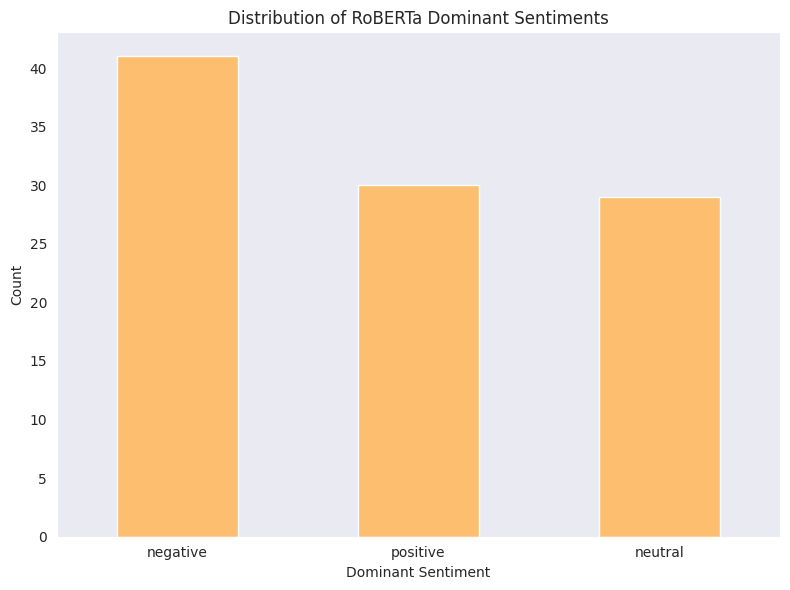

In [ ]:
sentiment_counts = songs['roberta_dominant_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=palette[6])
plt.title('Distribution of RoBERTa Dominant Sentiments')
plt.xlabel('Dominant Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###**Sentiment Analysis Using DistilRoBERTa**
* DistilRoBERTa is a pre-trained model that classifies emotions in English text data, trained on 6 diverse dataset that include data from Twitter and Reddit. It categorizes into Ekman's 6 sentiments and a neutral (a more nuanced description):
  * anger 🤬
  * disgust 🤢
  * fear 😨
  * joy 😀
  * neutral 😐
  * sadness 😭
  * surprise 😲
* The model is from HuggingFace: https://huggingface.co/j-hartmann/emotion-english-distilroberta-base

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-distilroberta-base")

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

RoBERTa scores on the example: `negative`

DistilRoBERTa scores on the example: `sadness`

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text) #this output is in a form of a tensor
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
      "distilroberta_anger": scores[0],
      "distilroberta_disgust": scores[1],
      "distilroberta_fear": scores[2],
      "distilroberta_joy": scores[3],
      "distilroberta_neutral": scores[4],
      "distilroberta_sadness": scores[5],
      "distilroberta_surprise": scores[6]
}
scores_dict

{'distilroberta_anger': 0.025447356,
 'distilroberta_disgust': 0.0015080239,
 'distilroberta_fear': 0.009400661,
 'distilroberta_joy': 0.013166314,
 'distilroberta_neutral': 0.009654363,
 'distilroberta_sadness': 0.8967903,
 'distilroberta_surprise': 0.044033024}

The following function will help in classifying the song lyrics into sentiment scores between 0 and 1 and then we can find the dominant sentiment.

In [ ]:
def distilroberta_sa(lyrics):
    encoded_text = tokenizer(lyrics, truncation=True, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
      "distilroberta_anger": scores[0],
      "distilroberta_disgust": scores[1],
      "distilroberta_fear": scores[2],
      "distilroberta_joy": scores[3],
      "distilroberta_neutral": scores[4],
      "distilroberta_sadness": scores[5],
      "distilroberta_surprise": scores[6]
}
    return scores_dict

In [ ]:
res = {}
for song, lyrics in song_lyrics_dict.items():
 res[song] = distilroberta_sa(lyrics)

In [ ]:
res

{"it's you - radio edit by syn cole": {'distilroberta_anger': 0.053434715,
  'distilroberta_disgust': 0.0047850967,
  'distilroberta_fear': 0.0220828,
  'distilroberta_joy': 0.09924817,
  'distilroberta_neutral': 0.19294538,
  'distilroberta_sadness': 0.46748343,
  'distilroberta_surprise': 0.16002035},
 "now that we're dead by metallica": {'distilroberta_anger': 0.018578865,
  'distilroberta_disgust': 0.0024482328,
  'distilroberta_fear': 0.014427924,
  'distilroberta_joy': 0.012157539,
  'distilroberta_neutral': 0.017127143,
  'distilroberta_sadness': 0.93191355,
  'distilroberta_surprise': 0.0033467223},
 'girlfriend in a coma - 2011 remaster by the smiths': {'distilroberta_anger': 0.025447356,
  'distilroberta_disgust': 0.0015080239,
  'distilroberta_fear': 0.009400661,
  'distilroberta_joy': 0.013166314,
  'distilroberta_neutral': 0.009654363,
  'distilroberta_sadness': 0.8967903,
  'distilroberta_surprise': 0.044033024},
 'on the back of your neck by cienfue': {'distilroberta_ang

In [ ]:
distilroberta_sa = pd.DataFrame.from_dict(res, orient='index')
songs = pd.merge(songs, distilroberta_sa, left_on="track", right_index=True, how='left')

This next function looks at all the sentiment scores and decides which of them is the dominant sentiment based on the highest sentiment score of the 7 options.

In [ ]:
def determine_sentiment_class(row):
    max_score = max(row['distilroberta_anger'], row['distilroberta_disgust'], row['distilroberta_fear'],
                    row['distilroberta_joy'], row['distilroberta_neutral'], row['distilroberta_sadness'],
                    row['distilroberta_surprise'])
    if max_score == row['distilroberta_anger']:
        return 'anger'
    elif max_score == row['distilroberta_disgust']:
        return 'disgust'
    elif max_score == row['distilroberta_fear']:
        return 'fear'
    elif max_score == row['distilroberta_joy']:
        return 'joy'
    elif max_score == row['distilroberta_neutral']:
        return 'neutral'
    elif max_score == row['distilroberta_sadness']:
        return 'sadness'
    else:
        return 'surprise'

songs['distilroberta_dominant_sentiment'] = songs.apply(determine_sentiment_class, axis=1)

* **Keep in mind that for a machine learning task such as classification or clustering using the sentiment scores is more optimal than relying on the dominant sentiment since it carries more information.**

In [ ]:
songs.head()

,lyrics,playlist_genre,playlist_subgenre,track,roberta_negative,roberta_neutral,roberta_positive,roberta_dominant_sentiment,distilroberta_anger,distilroberta_disgust,distilroberta_fear,distilroberta_joy,distilroberta_neutral,distilroberta_sadness,distilroberta_surprise,distilroberta_dominant_sentiment
0,paints like a picture sings like a melody law ...,pop,electropop,it's you - radio edit by syn cole,0.160406,0.398638,0.440956,positive,0.053435,0.004785,0.022083,0.099248,0.192945,0.467483,0.160020,sadness
1,when darkness falls may it be that we should s...,rock,hard rock,now that we're dead by metallica,0.040265,0.472008,0.487727,positive,0.018579,0.002448,0.014428,0.012158,0.017127,0.931914,0.003347,sadness
2,girlfriend in a coma i know i know its seriou...,rock,permanent wave,girlfriend in a coma - 2011 remaster by the sm...,0.848009,0.130747,0.021244,negative,0.025447,0.001508,0.009401,0.013166,0.009654,0.896790,0.044033,sadness
3,fighting through the crowd and my heart is bea...,pop,indie poptimism,on the back of your neck by cienfue,0.055477,0.445327,0.499196,positive,0.629550,0.003689,0.301132,0.011853,0.014148,0.030697,0.008930,anger
4,bubblegum ice pop what else pinky ring dancing...,hiphop,hip hop,compound by trellion,0.142037,0.466861,0.391102,neutral,0.257144,0.003104,0.328621,0.043907,0.075218,0.192796,0.099209,fear


In [ ]:
songs.to_csv("distilroberta.csv", index=False)

In [ ]:
songs.to_csv("both_sentiment_models.csv", index=False)

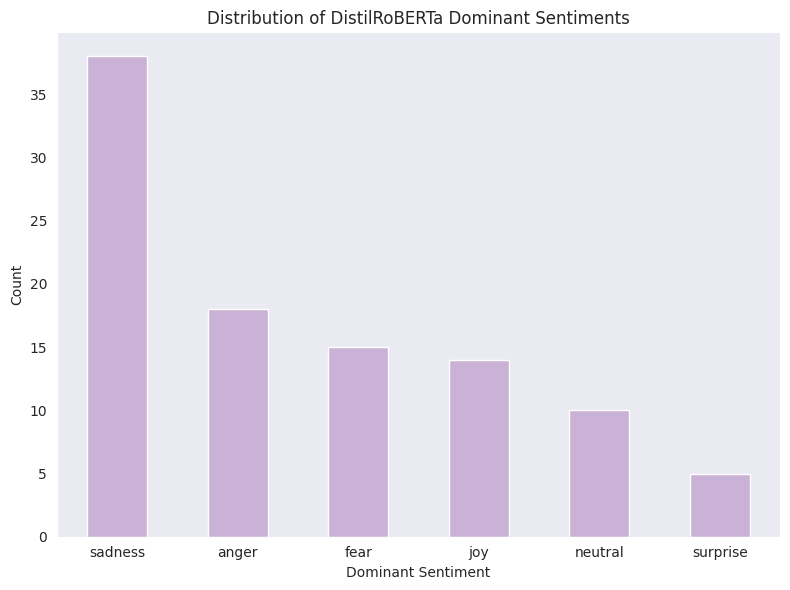

In [ ]:
sentiment_counts = songs['distilroberta_dominant_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=palette[8])
plt.title('Distribution of DistilRoBERTa Dominant Sentiments')
plt.xlabel('Dominant Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

No songs were classified to have 'disgust' as their dominant sentiment, which is not surprising considering that in natural language processing disgust is the hardest sentiment to detect.

##**Comparing Results Between Models**

In [ ]:
rez = pd.read_csv("both_sentiment_models.csv")
rez.head()

,lyrics,playlist_genre,playlist_subgenre,track,roberta_negative,roberta_neutral,roberta_positive,roberta_dominant_sentiment,distilroberta_anger,distilroberta_disgust,distilroberta_fear,distilroberta_joy,distilroberta_neutral,distilroberta_sadness,distilroberta_surprise,distilroberta_dominant_sentiment
0,paints like a picture sings like a melody law ...,pop,electropop,it's you - radio edit by syn cole,0.160406,0.398638,0.440956,positive,0.053435,0.004785,0.022083,0.099248,0.192945,0.467483,0.160020,sadness
1,when darkness falls may it be that we should s...,rock,hard rock,now that we're dead by metallica,0.040265,0.472008,0.487727,positive,0.018579,0.002448,0.014428,0.012158,0.017127,0.931914,0.003347,sadness
2,girlfriend in a coma i know i know its seriou...,rock,permanent wave,girlfriend in a coma - 2011 remaster by the sm...,0.848009,0.130747,0.021244,negative,0.025447,0.001508,0.009401,0.013166,0.009654,0.896790,0.044033,sadness
3,fighting through the crowd and my heart is bea...,pop,indie poptimism,on the back of your neck by cienfue,0.055477,0.445327,0.499196,positive,0.629550,0.003689,0.301132,0.011853,0.014148,0.030697,0.008930,anger
4,bubblegum ice pop what else pinky ring dancing...,hiphop,hip hop,compound by trellion,0.142037,0.466861,0.391102,neutral,0.257144,0.003104,0.328621,0.043907,0.075218,0.192796,0.099209,fear


In [ ]:
#Display a number of random songs with their information

import random

def display_random_songs(data, n=10):

    sample_data = data.sample(n)

    for idx, row in sample_data.iterrows():
        print(f"Track: {row['track']}")
        print(f"Playlist Genre: {row['playlist_genre']} | Subgenre: {row['playlist_subgenre']}")
        print(f"Lyrics: {row['lyrics'][:500]}...")  # Limit lyrics to 500 characters for readability
        print(f"Roberta Dominant Sentiment: {row['roberta_dominant_sentiment']}")
        print(f"DistilRoberta Dominant Sentiment: {row['distilroberta_dominant_sentiment']}")
        print("-" * 80)

In [ ]:
display_random_songs(rez)

Track: lose your soul by jelly roll
Playlist Genre: hiphop | Subgenre: southern hip hop
Lyrics: back when i was younger 15 years old i was tryna figure out where im gunna go i was out tryna find a block of gold a rainbow i was chasing a rainbow used to ride out every day all alone trying to figure out why the worlds so cold now i think about the words my mama told she said you can have it all but dont lose your soul dont lose your soul dont lose your soul dont lose your soul when i was 15 they said i was destined to fail preacher man told me i was headed to hell he told me death was the wa...
Roberta Dominant Sentiment: neutral
DistilRoberta Dominant Sentiment: anger
--------------------------------------------------------------------------------
Track: i smell pussy by g-unit
Playlist Genre: hiphop | Subgenre: gangster rap
Lyrics: sniff sniff son you smell that whats that i smell pussy is that you irv i smell pussy is that you ja i smell pussy is that you black i smell pussy is that y

##**How I Used Sentiment Analysis**
* **Does Sentiment Analysis help with classifying the genre of songs?**

###**Problem Statement: Could we predict the genre of a song based on the sentiments of the lyrics?**

In [ ]:
songs.columns

Index(['lyrics', 'playlist_genre', 'playlist_subgenre', 'track',
       'roberta_negative', 'roberta_neutral', 'roberta_positive',
       'roberta_dominant_sentiment', 'distilroberta_anger',
       'distilroberta_disgust', 'distilroberta_fear', 'distilroberta_joy',
       'distilroberta_neutral', 'distilroberta_sadness',
       'distilroberta_surprise', 'distilroberta_dominant_sentiment'],
      dtype='object')

**RoBERTa:**

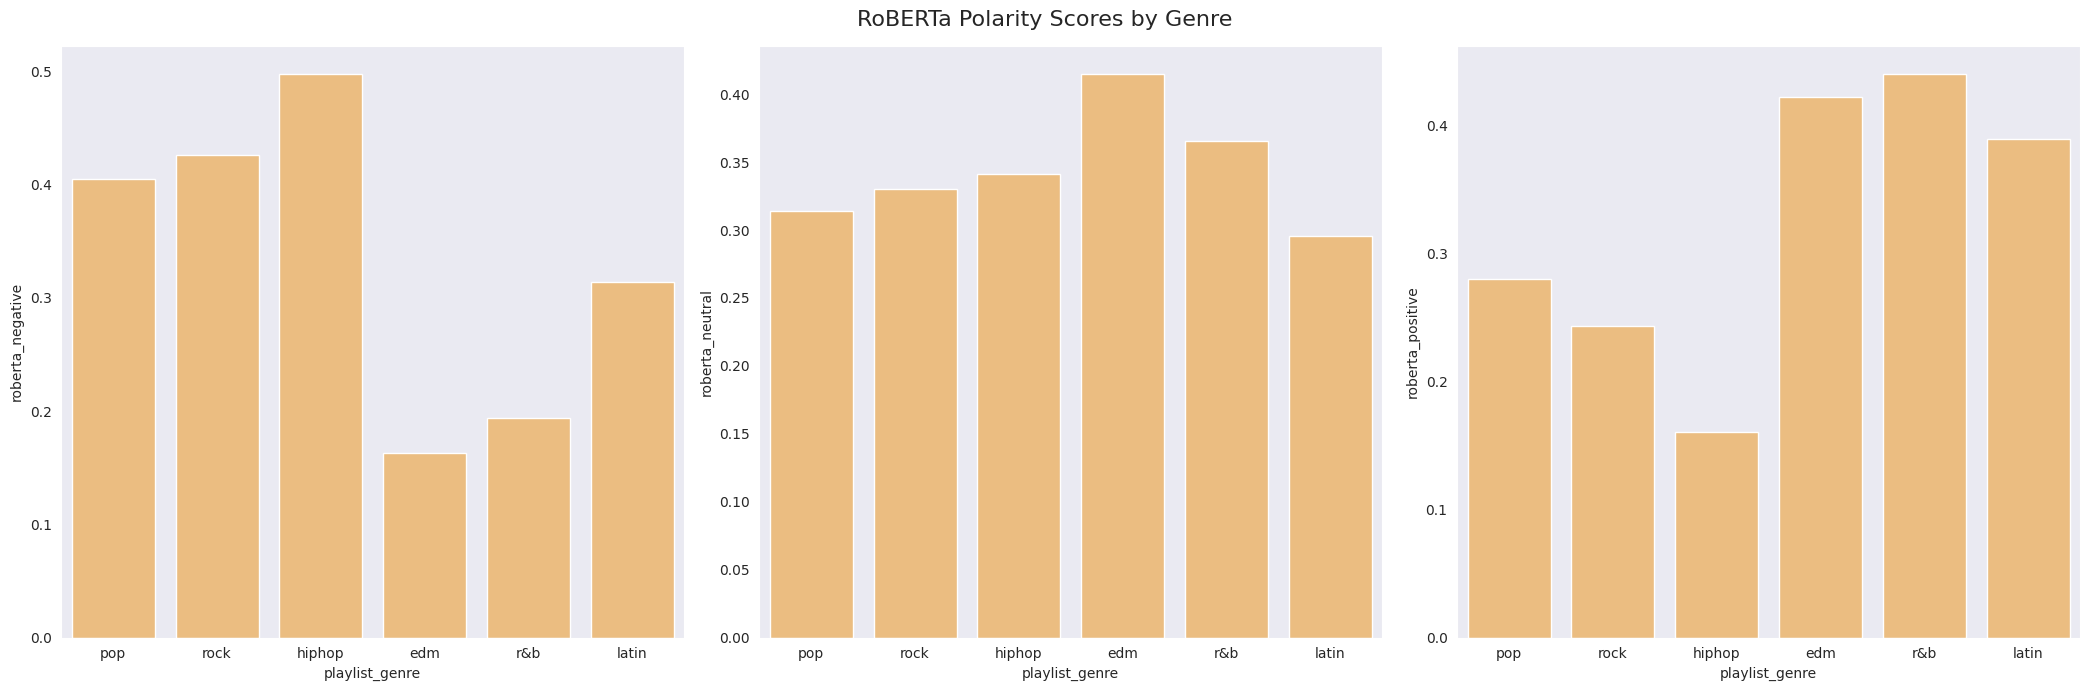

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
sns.barplot(data=songs, x='playlist_genre', y='roberta_negative', ax=axes[0], color=palette[6], errorbar=None)
sns.barplot(data=songs, x='playlist_genre', y='roberta_neutral', ax=axes[1], color=palette[6], errorbar=None)
sns.barplot(data=songs, x='playlist_genre', y='roberta_positive', ax=axes[2], color=palette[6], errorbar=None)
fig.suptitle("RoBERTa Polarity Scores by Genre", fontsize=16)
for ax in axes:
    ax.tick_params(axis='x', rotation=0)
plt.tight_layout();

**DistilRoBERTa:**

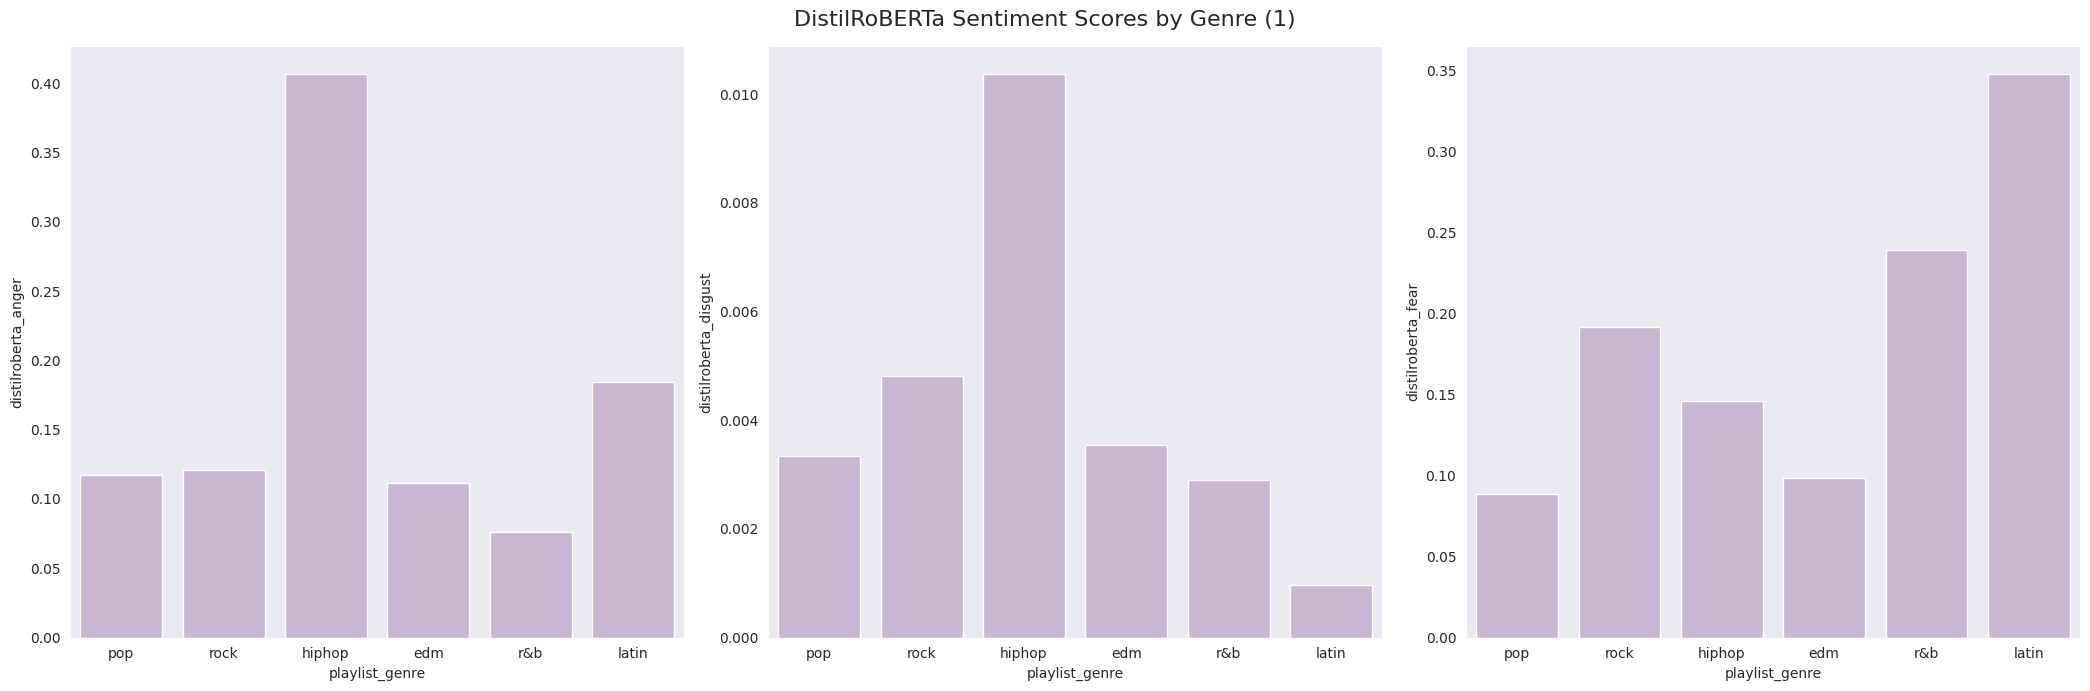

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_anger', ax=axes[0], color=palette[8], errorbar=None)
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_disgust', ax=axes[1], color=palette[8], errorbar=None)
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_fear', ax=axes[2], color=palette[8], errorbar=None)
fig.suptitle("DistilRoBERTa Sentiment Scores by Genre (1)", fontsize=16)
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=0)
plt.tight_layout();

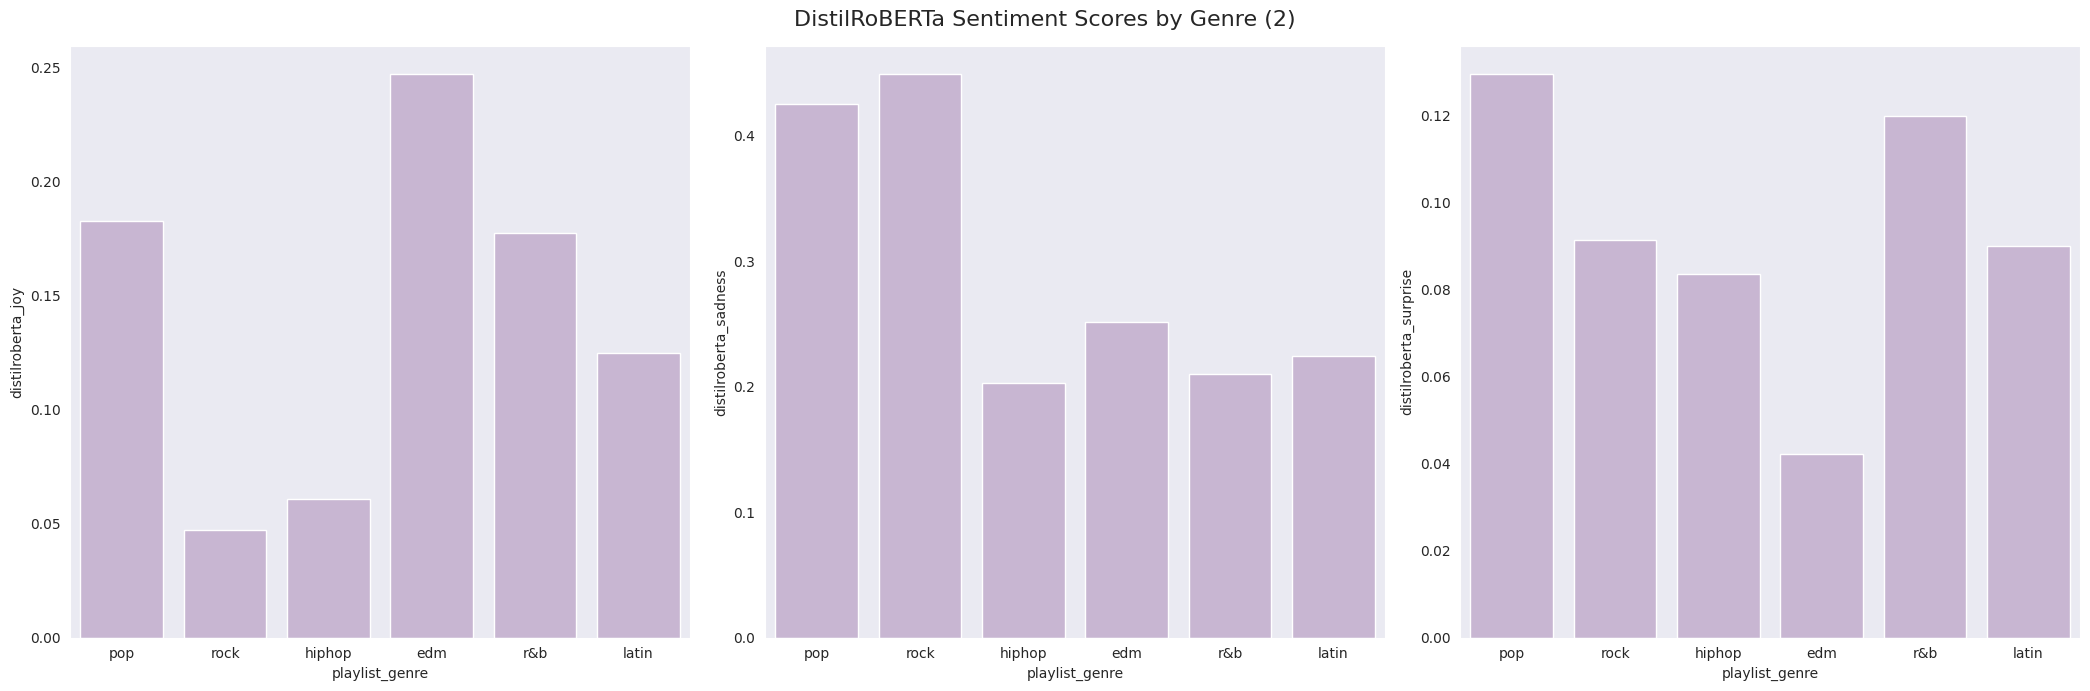

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_joy', ax=axes[0], color=palette[8], errorbar=None)
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_sadness', ax=axes[1], color=palette[8], errorbar=None)
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_surprise', ax=axes[2], color=palette[8], errorbar=None)
fig.suptitle("DistilRoBERTa Sentiment Scores by Genre (2)", fontsize=16)
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=0)
plt.tight_layout();

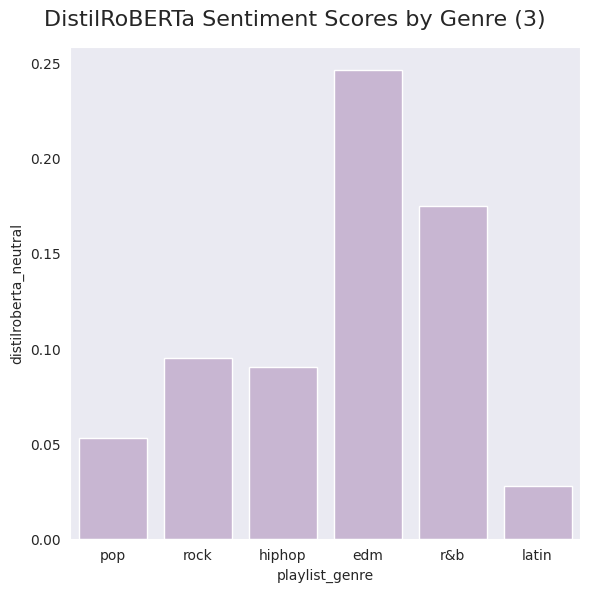

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data=songs, x='playlist_genre', y='distilroberta_neutral', ax=ax, color=palette[8], errorbar=None)
fig.suptitle("DistilRoBERTa Sentiment Scores by Genre (3)", fontsize=16)
ax.tick_params(axis='x', rotation=0)
plt.tight_layout();

* **Keep in mind that since we ran these models on song lyrics and songs might have multiple dominant sentiments these results might be inaccurate.**

From here on the possibilities are endless, we could use this new data to include in a classification or clustering for example to find out other insights from the other features of the dataset.

###**Other Use-cases**
* Introducing new information for:
  * Classifying Speech Distortions
  * Clustering Movie data

###**References**
Models:
* RoBERTa: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

* DistilRoBERTa:  https://huggingface.co/j-hartmann/emotion-english-distilroberta-base

Inspiration: https://www.youtube.com/watch?v=QpzMWQvxXWk
